In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from pmdarima import auto_arima
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error
from statsmodels.tools.eval_measures import rmse



data = pd.read_csv('AirPassengers.csv')
data.head(2)

data.info()

data['Month'] = pd.to_datetime(data.Month)
data.head()

data.info()




<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
Month          144 non-null object
#Passengers    144 non-null int64
dtypes: int64(1), object(1)
memory usage: 2.4+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
Month          144 non-null datetime64[ns]
#Passengers    144 non-null int64
dtypes: datetime64[ns](1), int64(1)
memory usage: 2.4 KB


In [2]:

# We have 12 years of data. 
# We will keep 11 years data as training
# 1 year data (12 months) as testing

train = data.loc[:len(data)-12, :]
test = data.loc[ len(data)-12:, :]


C:\ProgramData\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'No of air passengers')

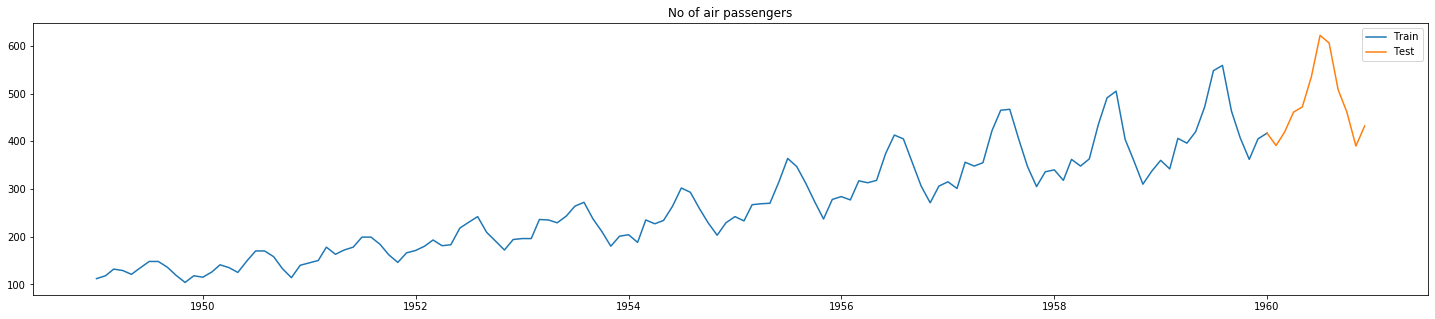

In [3]:

fig, ax = plt.subplots(figsize=(25, 5))
ax.plot('Month', '#Passengers', data=train, label='Train')
ax.plot('Month', '#Passengers', data=test, label='Test')
ax.legend()
ax.set_title('No of air passengers')

In [4]:
pwd

'C:\\Users\\Hp\\Downloads'

In [5]:
model = auto_arima(train['#Passengers'], 
                   seasonal=True, 
                   m=12,
                   max_p=7, max_d=5, max_q=7, 
                   max_P=4, max_D=4, max_Q=4, 
                   scoring='mse',
                   trace=True, error_action='ignore', suppress_warnings=True)



Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,1,1)[12]             : AIC=inf, Time=1.36 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=912.700, Time=0.05 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=907.606, Time=0.14 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=908.564, Time=0.20 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=906.884, Time=0.05 sec
 ARIMA(1,1,0)(0,1,1)[12]             : AIC=907.882, Time=0.23 sec
 ARIMA(1,1,0)(1,1,1)[12]             : AIC=inf, Time=0.96 sec
 ARIMA(2,1,0)(0,1,0)[12]             : AIC=908.389, Time=0.06 sec
 ARIMA(1,1,1)(0,1,0)[12]             : AIC=908.081, Time=0.08 sec
 ARIMA(0,1,1)(0,1,0)[12]             : AIC=907.694, Time=0.05 sec
 ARIMA(2,1,1)(0,1,0)[12]             : AIC=910.080, Time=0.16 sec
 ARIMA(1,1,0)(0,1,0)[12] intercept   : AIC=908.515, Time=0.09 sec

Best model:  ARIMA(1,1,0)(0,1,0)[12]          
Total fit time: 3.495 seconds


In [6]:

model.fit(train['#Passengers'])



ARIMA(order=(1, 1, 0), scoring_args={}, seasonal_order=(0, 1, 0, 12),
      suppress_warnings=True, with_intercept=False)

Text(0.5, 1.0, 'No of air passengers')

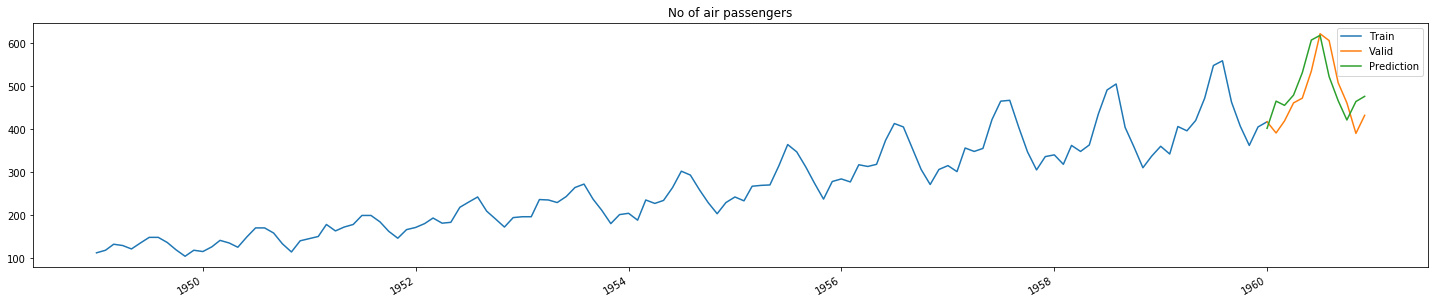

In [7]:

# Forecast for testing data

forecast = test.copy()  # Making deep copy
forecast['Predicted_Passengers'] = model.predict(n_periods= len(test))

fig, ax = plt.subplots(figsize=(25, 5))
ax.plot(train['Month'], train['#Passengers'], label='Train')
ax.plot(test['Month'], test['#Passengers'], label='Valid')
ax.plot(forecast['Month'], forecast['Predicted_Passengers'], label='Prediction')
fig.autofmt_xdate() # make space for and rotate the x-axis tick labels
ax.legend()
ax.set_title('No of air passengers')

In [8]:
forecast.head(2)

,Month,#Passengers,Predicted_Passengers
132,1960-01-01,417,401.764762
133,1960-02-01,391,465.069861


In [9]:
from sklearn.metrics import accuracy_score
